# Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset_diabetes/diabetic_data_clean.csv')
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medical_specialty_no,age_range
0,1,149190,55629189,0,0,[10-20),1,1,7,3,...,0,0,0,0,0,0,1,2,72,1
1,2,64410,86047875,1,0,[20-30),1,1,7,2,...,0,0,0,0,0,1,1,0,72,2
2,3,500364,82442376,0,1,[30-40),1,1,7,2,...,0,0,0,0,0,0,1,0,72,4
3,4,16680,42519267,0,1,[40-50),1,1,7,1,...,0,0,0,0,0,0,1,0,72,5
4,5,35754,82637451,0,1,[50-60),2,1,2,3,...,0,0,0,0,0,1,1,2,72,6


In [3]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'medical_specialty_no', 'age_range'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medical_specialty_no,age_range
0,149190,55629189,0,0,[10-20),1,1,7,3,NaN,...,0,0,0,0,0,0,1,2,72,1
1,64410,86047875,1,0,[20-30),1,1,7,2,NaN,...,0,0,0,0,0,1,1,0,72,2
2,500364,82442376,0,1,[30-40),1,1,7,2,NaN,...,0,0,0,0,0,0,1,0,72,4
3,16680,42519267,0,1,[40-50),1,1,7,1,NaN,...,0,0,0,0,0,0,1,0,72,5
4,35754,82637451,0,1,[50-60),2,1,2,3,NaN,...,0,0,0,0,0,1,1,2,72,6


In [6]:
df.describe()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medical_specialty_no,age_range
count,9.805300e+04,9.805300e+04,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,1.658294e+08,5.484792e+07,0.326548,0.461189,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,...,0.006945,0.000133,0.000010,0.0,0.000010,0.538219,0.768472,0.819598,46.551283,7.051411
std,1.024322e+08,3.866175e+07,0.731907,0.498514,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,...,0.084871,0.011514,0.003194,0.0,0.003194,0.498540,0.421811,0.924449,28.329233,1.774772
min,1.252200e+04,1.350000e+02,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.528566e+07,2.350234e+07,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,18.000000,6.000000
50%,1.533019e+08,4.687790e+07,0.000000,0.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,69.000000,7.000000
75%,2.305007e+08,8.800306e+07,0.000000,1.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,2.000000,72.000000,9.000000
max,4.438672e+08,1.895026e+08,4.000000,2.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,...,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,72.000000,9.000000


In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'medical_specialty_no', 'age_range'],
      dtype='object')

__Target Variable__

Text(0.5, 1.0, 'Number of Hospital Readmissions')

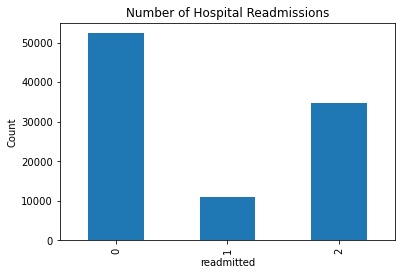

In [8]:
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
#plt.xticks('')
plt.title('Number of Hospital Readmissions')

* The target variable 'readmitted' in the initial dataset contains three categories:


    - 0: “No” for no record of readmission. 
    - 1: “<30” if the patient was readmitted in less than 30 days.
    - 2: “>30” if the patient was readmitted in more than 30 days.

__Let's Explore the other variables and decided how best to utilize them given our results.__

In [9]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'medical_specialty_no', 'age_range'],
      dtype='object')

The first two variables in the data set are numeric but are unique identifiers as such won't be used for any ED of statistical analysis. 
* 'encounter_id'
* 'patient_nbr'

In [ ]:
df.groupby('gender').plot(kind='bar')

In [10]:
categorical_values= ['race', 'gender','age_range','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                    'change', 'diabetesMed'] 
contnious_values = ['time_in_hospital', 'medical_speciality_no','num_lab_procedures','num_procedures', 'num_medications',
                     'number_outpatient','number_emergency', 'number_inpatient'] 
#explore_3_columns = ['diag_1','diag_2', 'diag_3', 'number_diagnoses']
generic_medication = ['max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'] 

Text(0, 0.5, 'Count')

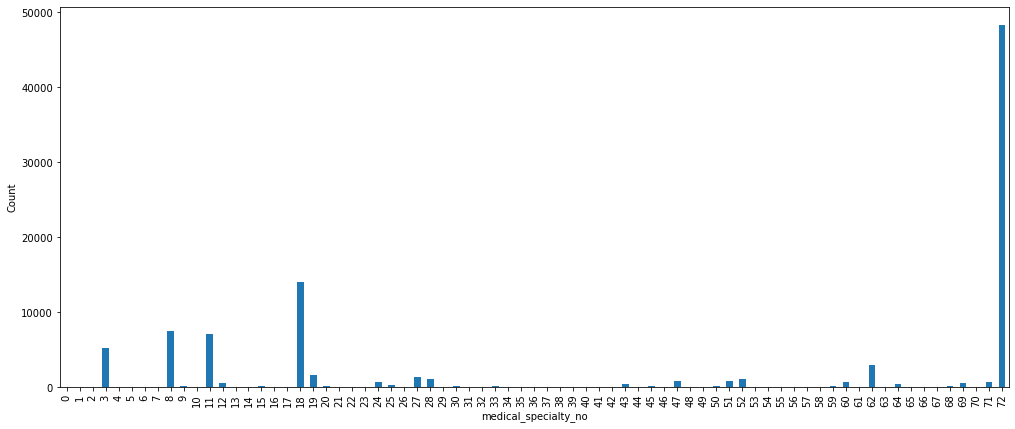

In [11]:
fig = plt.figure(figsize = (17,7))
df.groupby('medical_specialty_no').size().plot(kind='bar')
plt.ylabel('Count')
#plt.xticks('medical_speciality')

In [12]:
df.medical_specialty_no.value_counts()

72    48318
18    13967
8      7472
11     7140
3      5218
      ...  
56        1
48        1
46        1
21        1
42        1
Name: medical_specialty_no, Length: 73, dtype: int64

__Set One of Attributes__

Text(0.5, 1.0, 'test')

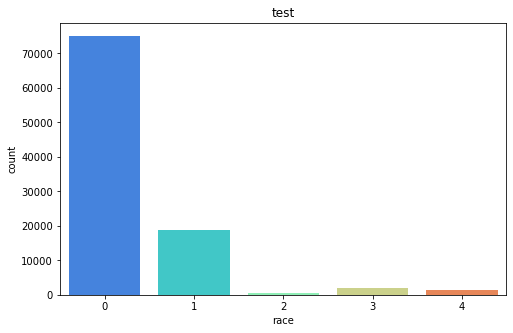

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='race',data=df, palette='rainbow')
plt.title("test")

point plot: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

In [ ]:
plt.tight_layout()
fig, axes = plt.subplots(1, ncols=len(categorical_values), figsize=(30,5))

for ix, col in enumerate(categorical_values):
    df.groupby(col).plot(kind ="bar",ax=axes[ix])
    axes[ix].set_xlabel(f'Distributions {col}')

plt.suptitle('Distributions', fontsize=15)
plt.show();

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x1b23943a0>
Traceback (most recent call last):
  File "/Users/aishakamara/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py", line 200, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


__Note to  self:__

    - find out the related values for admission type. 
    - find out the related values for discharge disposition
    - find out the related values for admission source. 

In [ ]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=len(contnious_values), figsize=(25,5), sharey=True)

for ix, col in enumerate(contnious_values):
    sns.distplot(df[col], kde=False, label=col, ax=axes[ix])
    axes[ix].set_xlabel(f'Distributions {col}')

plt.suptitle('Distributions', fontsize=15)
plt.show();  

* On average patients spent 4.4 days in the hospital. Shortest being one day and the longest being 14 days. 
* On average 43 lab tests were performed during the patients initial admission with a max of 123 performed. 
* On average 1.3 non lab procedures were performed during the patients initial admission.
* On average 16 distinct generic generic types of medication were administered to the patient during their initial admission and hospital stay.

__Diagnoses Attributes__

In [ ]:
# plt.tight_layout()
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5), sharey=True)

# for ix, col in enumerate(explore_3_columns):
#     sns.distplot(df[col], kde=False, label=col, ax=axes[ix])
#     axes[ix].set_xlabel(f'Distributions {col}')

# plt.suptitle('Distributions', fontsize=15)
# plt.show();

In [ ]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5), sharey=True)

for ix, col in enumerate(explore_5_columns):
    sns.distplot(df[col], kde=False, label=col, ax=axes[ix])
    axes[ix].set_xlabel(f'Distributions {col}')

plt.suptitle('Distributions', fontsize=15)
plt.show();

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
           annot=True,
           cmap='coolwarm',
           vmin=-1)

* Number of medications positively correlated with time spent in the hospital 
* Number of lab procedures positively correlated with time spent in the hospital
* Number of lab tests performed during initial admission is positively correlated to the number of distinct generic medication administered during initial hospital admission and stay. 
* Number of inpatient visits of the patient in the year preceding initial admission, is positively correlated to readmission. Do not note any other strong correlations in regards to readmission. 